In [1]:
import cv2 
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import datetime
import time

def show_image(img):
    plt.imshow(img)
    plt.show()

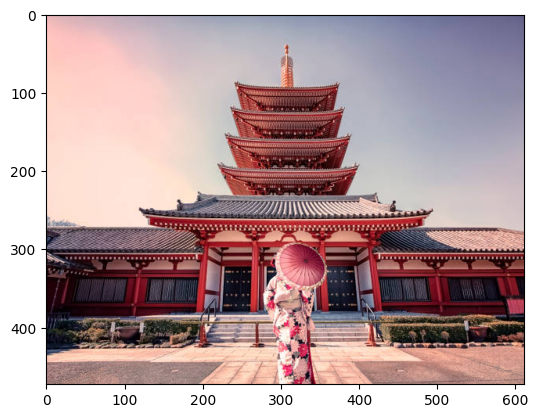

(473, 612, 3)


In [5]:
sensoji_temple = cv2.imread("../Images/sensoji_temple.jpg")
sensoji_temple = cv2.cvtColor(cv2.imread("../Images/sensoji_temple.jpg"), cv2.COLOR_BGR2RGB)

show_image(sensoji_temple)
print(sensoji_temple.shape)

In [9]:
pixel_values = sensoji_temple.reshape((-1, 3))
print(pixel_values.shape)

pixel_values = np.float32(pixel_values)
print(pixel_values.shape)

(289476, 3)
(289476, 3)


In [11]:
# define stopping criteria = ( type, max_iter = 10 , epsilon = 1.0 )
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.2)
print(criteria)

(3, 100, 0.2)


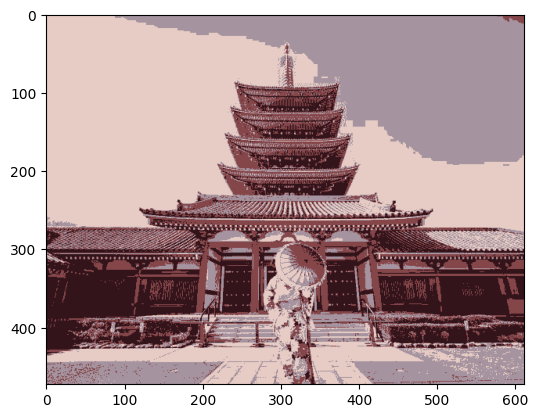

In [12]:
# number of clusters (K)

k = 4

_, labels, (centers) = cv2.kmeans(pixel_values, k, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)

centers = np.uint8(centers)

labels = labels.flatten()

segmented_image = centers[labels.flatten()]

segmented_image = segmented_image.reshape(sensoji_temple.shape)
show_image(segmented_image)

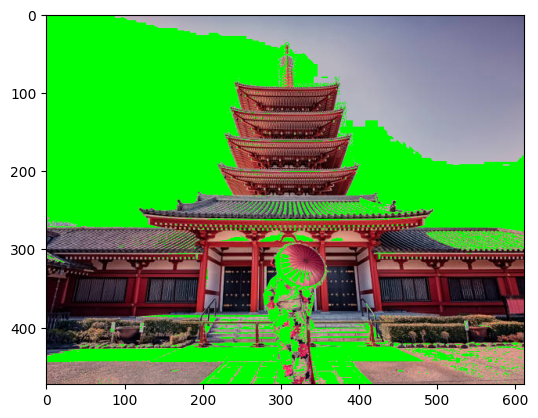

In [13]:
masked_image = np.copy(sensoji_temple)
masked_image = masked_image.reshape((-1, 3))

cluster = 2

masked_image[labels == cluster] = [0, 255, 0]

masked_image = masked_image.reshape(sensoji_temple.shape)

show_image(masked_image)

Enter the number of clusters for image 1, 2, and 3 respectively: 3 3 3
AxesImage(size=(600, 800))


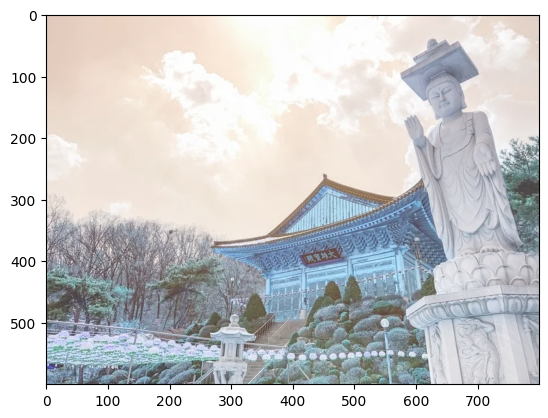

In [6]:
image1 = cv2.imread("../Images/korean_temple.webp")
image2 = cv2.imread("../Images/viet_temple.jpg")
image3 = cv2.imread("../Images/korean_fort.png")

images = [image1, image2, image3]

reshaped = [0, 0, 0]
for i in range(0, 3):
    reshaped[i] = images[i].reshape(images[i].shape[0] * images[i].shape[1], images[i].shape[2])

numClusters = list(map(int, input("Enter the number of clusters for image 1, 2, and 3 respectively: ").split()))

clustering = [0, 0, 0]
for i in range(0, 3):
    kmeans = KMeans(n_clusters=numClusters[i], n_init=40, max_iter=500).fit(reshaped[i])
    clustering[i] = np.reshape(np.array(kmeans.labels_, dtype=np.uint8), (images[i].shape[0], images[i].shape[1]))

sortedLabels = [[], [], []]
for i in range(0, 3):
    sortedLabels[i] = sorted([n for n in range(numClusters[i])], key=lambda x: -np.sum(clustering[i] == x))

kmeansImage = [0, 0, 0]
concatImage = [[], [], []]
for j in range(0, 3):
    kmeansImage[j] = np.zeros(images[j].shape[:2], dtype=np.uint8)
    for i, label in enumerate(sortedLabels[j]):
        kmeansImage[j][clustering[j] == label] = int((255) / (numClusters[j] - 1)) * i
    concatImage[j] = np.concatenate((images[j], 193 * np.ones((images[j].shape[0], images[j].shape[1], 1), dtype=np.uint8)), axis=2)

print(plt.imshow(concatImage[0]))

AxesImage(size=(532, 800))


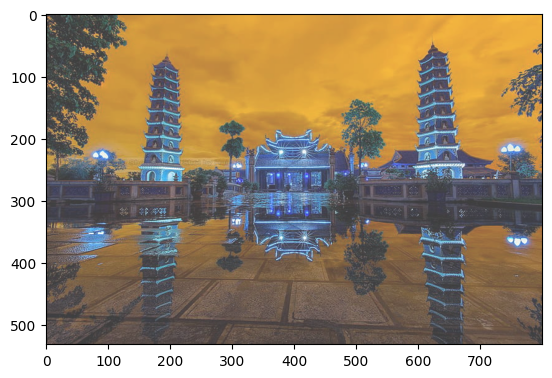

In [5]:
print(plt.imshow(concatImage[1]))

AxesImage(size=(556, 622))


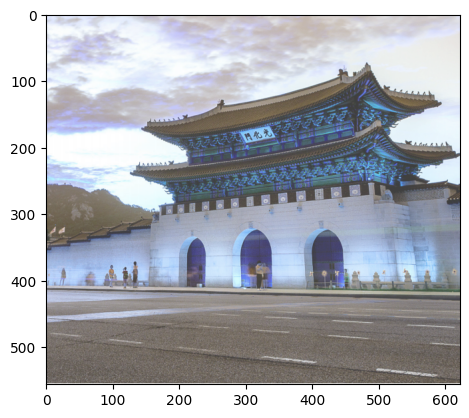

In [7]:
print(plt.imshow(concatImage[2]))